In [138]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [139]:
df = pd.read_csv("insurance.csv")

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df_ohe = pd.get_dummies(df)

In [142]:
df_ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [143]:
x = df_ohe.drop('charges', axis = 1)
y = df_ohe['charges']
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [144]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size=0.2)

In [145]:
def fmae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))


def fmse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))



In [146]:
x_tr.shape, y_tr.shape

((1070, 11), (1070,))

In [147]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae

In [148]:
tf.random.set_seed(8)

model = tf.keras.Sequential([
    Dense(11),
    Dense(100),
    Dense(1)
])

model.compile(
    loss = mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

model.fit(x_tr, y_tr, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 11381.4355 - mae: 11381.4355
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 7582.5586 - mae: 7582.5586
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7221.1270 - mae: 7221.1270
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7072.1323 - mae: 7072.1323
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 6852.4136 - mae: 6852.4136
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 6648.7095 - mae: 6648.7095
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 6407.7114 - mae: 6407.7114
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 6297.5376 - mae: 6297.5376
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 6200.5259 - mae: 6200.5259
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 6104.5161 - mae: 6104.51

In [149]:
y_pred = model.predict(x_test)

mae1 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae1

9/9 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3395.6147>

In [150]:
tf.random.set_seed(8)

model_01 = tf.keras.Sequential([
    Dense(11),
    Dense(1)
])

model_01.compile(
    loss = mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

history_01 = model_01.fit(x_tr, y_tr, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13088.4277 - mae: 13088.4277
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12767.9346 - mae: 12767.9346
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12044.3877 - mae: 12044.3877
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 10841.2295 - mae: 10841.2295
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 9443.2568 - mae: 9443.2568
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8259.8184 - mae: 8259.8184
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7597.7778 - mae: 7597.7778
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7406.9844 - mae: 7406.9844
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7362.6655 - mae: 7362.6655
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7336.3257 - mae: 7

In [151]:
y_pred_01 = model_01.predict(x_test)

mae_01 = fmae(y_test=y_test, y_pred=y_pred_01)
mae_01

9/9 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3347.9524>

In [152]:
model_01.evaluate(x_test, y_test), model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3395.6150 - mae: 3395.6150


([3347.95263671875, 3347.95263671875], [3395.614990234375, 3395.614990234375])

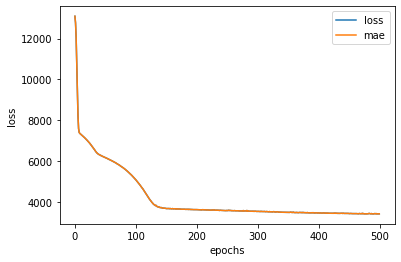

In [153]:
pd.DataFrame(history_01.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


In [154]:
import pandas as pd
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [155]:
df1 = pd.read_csv("insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Normalize our data**

In [156]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

x2 = df1.drop("charges", axis = 1)
y2 = df1["charges"]

x_tr2, x_test2, y_tr2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

ct.fit(x_tr2)

x_tr_normal = ct.transform(x_tr2)
x_test_normal = ct.transform(x_test2)

ValueError: A given column is not a column of the dataframe

In [ ]:
x_tr_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
x_tr_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_tr2.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Model on normalised data

In [ ]:
tf.random.set_seed(8)

model_02 = tf.keras.Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

model_02.compile(
    loss= tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

model_02.fit(x_tr_normal, y_tr2, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.0957 - mae: 13344.0957
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13336.7061 - mae: 13336.7061
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13317.5732 - mae: 13317.5732
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13276.3203 - mae: 13276.3203
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13202.0146 - mae: 13202.0146
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13083.9854 - mae: 13083.9854
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12911.7275 - mae: 12911.7275
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12675.1230 - mae: 12675.1230
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12364.1641 - mae: 12364.1641
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11970.82

In [ ]:
y_pred_02 = model_02.predict(x_test_normal)

9/9 [==============================] - 0s 3ms/step


In [ ]:
model_02.evaluate(x_test_normal, y_test2)

9/9 [==============================] - 0s 2ms/step - loss: 3165.2275 - mae: 3165.2275


[3165.2275390625, 3165.2275390625]

In [159]:
fmae(y_test = y_test2, y_pred = y_pred_02)

<tf.Tensor: shape=(), dtype=float32, numpy=3165.2275>

In [158]:
mae_01

<tf.Tensor: shape=(), dtype=float32, numpy=3347.9524>